In [2]:
#Mounting Google Drive to pass on documents easier
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
census = pd.read_csv('/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/CA03/census_data.csv')

In [4]:
censuscategorized = census

censuscategorized.replace(regex={r'[a]. ': 1, r'[b]. ': 2, r'[c]. ': 3, r'[d]. ': 4, r'[e]. ': 5}, inplace = True)

censuscategorizedtrain = censuscategorized[censuscategorized.flag == 'train']
censuscategorizedtest = censuscategorized[censuscategorized.flag == 'test']

In [5]:
censuscategorizedtrain = censuscategorized[censuscategorized.flag == 'train']
censuscategorizedtest = censuscategorized[censuscategorized.flag == 'test']

In [6]:
#Get rid of y and flag for xTrain and use y for ytrain
X_train = censuscategorizedtrain.drop(['y', 'flag'], axis='columns', inplace=False)
y_train = censuscategorizedtrain.y

X_test = censuscategorizedtest.drop(['y', 'flag'], axis='columns', inplace=False)
y_test = censuscategorizedtest.y

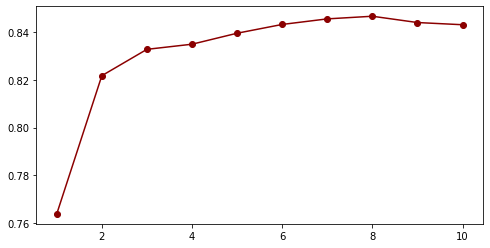

In [7]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
results = []
max_depth_options = [1,2,3,4,5,6,7,8,9,10]

for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state = 101)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color = "darkred", marker = "o")

**Random Forest Model**

Build a similar graph with random forest with n values = [50,100,150,200,250,300,350,400,450,500]

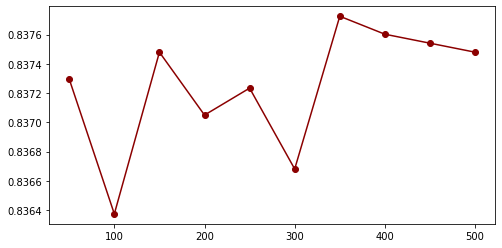

In [8]:
#import random forest
from sklearn.ensemble import RandomForestClassifier
results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
  model = RandomForestClassifier(n_estimators=trees)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color = "darkred", marker = "o")

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.7469697026723048

In [10]:
#Accuracy goes on a downward trend on the first 100 n_estimators then slowly goes upwards til 400 before dropping down again
#optimal value seems to be between the range of 350 - 450. Approximately 400.

**ADABOOST**

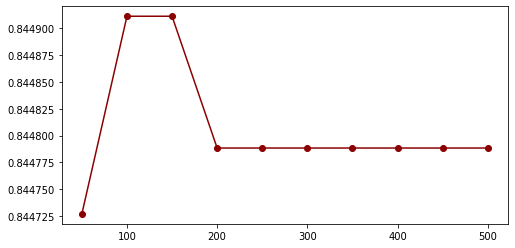

In [11]:
#Setting up function for ADABOOST
from sklearn.ensemble import AdaBoostClassifier
results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
  model = AdaBoostClassifier(n_estimators=trees)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color = "darkred", marker = "o")

In [12]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.7460076328264228

In [13]:
#Accuracy goes on an upward trend til 100, stagnates to around 150, then drops til it hits 200 n_estimators
#After that, the line stays static past 200 estimators

#Optimal value seems to be between 90 and 160.

**Gradient Boost (classifier)**

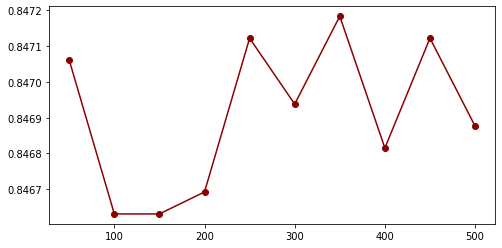

In [14]:
#Setting Up GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
  model = GradientBoostingClassifier(n_estimators=trees)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color = "darkred", marker = "o")

In [15]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.7609339548491469

In [16]:
#There seems to be an up and down pattern going on for this classifier type
#The optimal value is somewhere between 325 and 375 around 350.

**XGB Model**

In [17]:
import xgboost as xgb

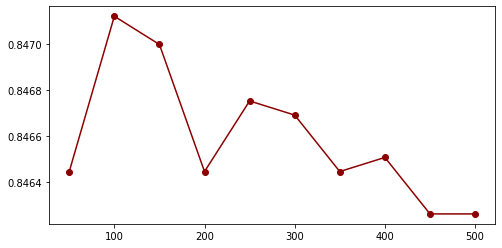

In [18]:
#Setting Up XGB Model

results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimators:
  model = xgb.XGBClassifier(n_estimators=trees)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color = "darkred", marker = "o")

In [19]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.7591849222822954

In [20]:
#The pattern here seems to be a downward trend in terms of accuracy
#the optimal point is somewhere between 75 and 125, around 100

Create a function that generates output of accuracy and AUC on an excel document. The n_estimator value I will be using will be the optimal mean of the values for each classifier above. (150 + 125 + 350 + 100) / 4 = Approximately 181

In [38]:
EnsembleParameters = pd.read_csv('/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/CA04/EnsembleParameters.csv')

In [39]:
EnsembleParameters.head()

,Classifier,n_estimator,Accuracy,Auc_score
0,Random Forest,181,NaN,NaN
1,AdaBoost,181,NaN,NaN
2,Gradient Boost,181,NaN,NaN
3,XGB,181,NaN,NaN


In [24]:
from sklearn.metrics import accuracy_score

In [40]:
def model():
  for index, row in EnsembleParameters.iterrows():
    if row["Classifier"] == "Random Forest":
      model = RandomForestClassifier(n_estimators=row["n_estimator"])
      model.fit(X_test, y_test)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      roc_score = roc_auc_score(y_test, y_pred)
      EnsembleParameters.at[index, 'Accuracy'] = accuracy
      EnsembleParameters.at[index, 'Auc_score'] = roc_score
    elif row["Classifier"] == "AdaBoost":
      model = AdaBoostClassifier(n_estimators=row["n_estimator"])
      model.fit(X_test, y_test)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      roc_score = roc_auc_score(y_test, y_pred)
      EnsembleParameters.at[index, 'Accuracy'] = accuracy
      EnsembleParameters.at[index, 'Auc_score'] = roc_score
    elif row["Classifier"] == "Gradient Boost":
      model = GradientBoostingClassifier(n_estimators=row["n_estimator"])
      model.fit(X_test, y_test)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      roc_score = roc_auc_score(y_test, y_pred)
      EnsembleParameters.at[index, 'Accuracy'] = accuracy
      EnsembleParameters.at[index, 'Auc_score'] = roc_score
    elif row["Classifier"] == "XGB":
      model = xgb.XGBClassifier(n_estimators=row["n_estimator"])
      model.fit(X_test, y_test)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      roc_score = roc_auc_score(y_test, y_pred)
      EnsembleParameters.at[index, 'Accuracy'] = accuracy
      EnsembleParameters.at[index, 'Auc_score'] = roc_score



model()
print(EnsembleParameters)
EnsembleParameters.head()

       Classifier  n_estimator  Accuracy  Auc_score
0   Random Forest          181  0.871814   0.797014
1        AdaBoost          181  0.846692   0.750936
2  Gradient Boost          181  0.850193   0.763644
3             XGB          181  0.850193   0.762926


,Classifier,n_estimator,Accuracy,Auc_score
0,Random Forest,181,0.871814,0.797014
1,AdaBoost,181,0.846692,0.750936
2,Gradient Boost,181,0.850193,0.763644
3,XGB,181,0.850193,0.762926
